In [ ]:
import numpy as np
import pandas as pd 
import glob 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import random
from sklearn.metrics import mean_squared_error, root_mean_squared_error


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from Math_From_Scratch import regression, econometrics ,error_metrics, activation

ModuleNotFoundError: No module named 'regression'

In [ ]:
datasets_path = glob.glob(r'..\data\*.csv')

csv_files = {
    path.split("\\")[-1][:-4]: path
    for path in datasets_path
}

WINDOW_SIZE = 5

df = pd.read_csv(csv_files['dehliclimate'])
df['date'] = pd.to_datetime(df['date'])

features = df.drop(columns=['meantemp','date']).columns
all_metrics = df.drop(columns=['date']).columns

df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_of_week
df['year'] = df['date'].dt.year


target = ["meantemp"]

X = df[features]
y = df[target]

val_size = 150

X_val = X[-val_size:]
y_val = y[-val_size:]
X_train = X[:-val_size]
y_train = y[:-val_size]


## Gradient Descent Update Rule

**Given:**

* **Learning rate:** $\alpha$

* **Cost function:** $J(\mathbf{w}, b) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2$

**Gradients:**

* **Partial derivative with respect to $w_j$:**
    $$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x_j^{(i)}$$

* **Partial derivative with respect to $b$:**
    $$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

**Update rules:**

The parameters $w_j$ and $b$ are updated iteratively using the following rules:

$$w_j := w_j - \alpha \cdot \frac{\partial J}{\partial w_j} \quad \text{and} \quad b := b - \alpha \cdot \frac{\partial J}{\partial b}$$

**Explanation:**

* The update rule for each weight $w_j$ involves subtracting the product of the learning rate ($\alpha$) and the partial derivative of the cost function with respect to that weight. This moves the weight in the direction that reduces the cost.

* Similarly, the update rule for the bias $b$ involves subtracting the product of the learning rate ($\alpha$) and the partial derivative of the cost function with respect to the bias. This adjusts the bias to minimize the cost.

* The learning rate $\alpha$ controls the step size of each update. A smaller $\alpha$ leads to smaller steps and potentially slower convergence, while a larger $\alpha$ can lead to larger steps and faster convergence but risks overshooting the minimum.

In [2]:
W_SIZE = len(list(features))

weights = np.array([])
bias = 0 #random.random()*0.001

for w in range(W_SIZE):
    weights = 0.0 #np.append(weights,random.random() * 0.000001)

lr = 0.001

m, n = X_train.shape 
x = X_train.values
y = y_train.values.reshape(len(y_train))

cost_hist = []
weight_hist = []
bias_hist = []
loss_hist = []


for epoch in range(50):
        if np.any(np.isnan(weights)) or np.any(np.isinf(weights)):
            print("Numerical instability detected")
            break
        pred = X_train.dot(weights) + bias
        
        error = pred - y


        mse  = np.mean((pred - y)**2)
        rmse = np.sqrt(mse)
        if epoch % 50 == 0:
            print("RMSE", rmse)

        

        dw = (1 / m) * x.T.dot(error)
        db = np.mean(error)


        weights -= lr * dw
        bias -= lr * db

        cost_hist.append(error)
        weight_hist.append(weights.copy())
        bias_hist.append(bias)
        loss_hist.append(rmse)

print("Weights:", weights)
print("Bias", bias)





NameError: name 'features' is not defined

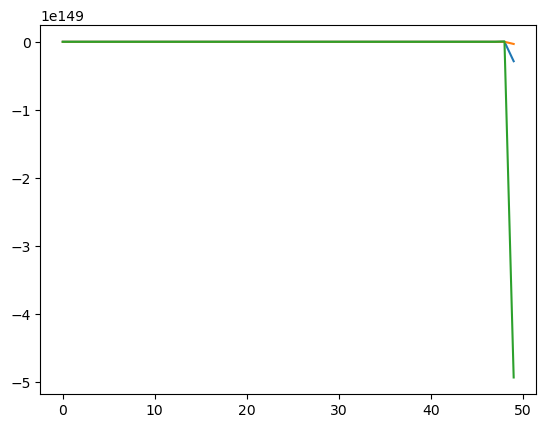

In [379]:
plt.plot(np.arange(len(weight_hist)),weight_hist)

In [371]:
pred_last_train = X_train.dot(weights) + bias
grad_results = y_train.copy()
grad_results['pred'] = pred_last_train
grad_results['residual'] = y - grad_results['pred']
grad_results

,meantemp,pred,residual
0,10.000000,-3.936162e+152,3.936162e+152
1,7.400000,-3.946139e+152,3.946139e+152
2,7.166667,-3.948407e+152,3.948407e+152
3,8.666667,-3.939039e+152,3.939039e+152
4,6.000000,-3.939990e+152,3.939990e+152
...,...,...,...
1307,29.266667,-3.878122e+152,3.878122e+152
1308,29.125000,-3.872455e+152,3.872455e+152
1309,30.687500,-1.213582e+152,1.213582e+152
1310,32.562500,-3.865415e+152,3.865415e+152


In [85]:
y_pred, intercept , coef = regression.multiple_regression(X_train,y_train, return_params=True) 

result_df = y_train[target]
result_df['y_pred'] = y_pred 

error_metrics.MSE(result_df[target].values,result_df['y_pred'].values)

array([35.56216615])

In [183]:
pred

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1307   NaN
1308   NaN
1309   NaN
1310   NaN
1311   NaN
Length: 1312, dtype: float64

In [159]:
weights

humidity       -1.263695e+17
wind_speed     -1.416956e+16
meanpressure   -2.183186e+18
dtype: float64

In [157]:
bias

19623357250.188957

In [143]:
(1 / m) * X_train.T * error

,0,1,2,3,4,5,6,7,8,9,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311
humidity,-0.290591,-0.128721,-0.107055,-0.176038,-0.030870,-0.094604,-0.088489,-0.166085,-0.336045,-0.263964,...,-1.553227,-1.535277,-1.493466,-1.542643,-1.537143,-1.509633,-1.520300,-1.577432,-1.319625,-1.352048
wind_speed,-0.000000,-0.004169,-0.005701,-0.003044,-0.001315,-0.001691,-0.007093,-0.018619,-0.081962,-0.031505,...,-0.122851,-0.074698,-0.095239,-0.040574,-0.030987,-0.085348,-0.106692,-0.139426,-0.113148,-0.167772
meanpressure,-3.492819,-1.424047,-1.253483,-2.510188,-0.361379,-1.163131,-1.148327,-2.655493,-6.668452,-4.324176,...,-19.000989,-17.477373,-18.400236,-16.704140,-16.679777,-18.171282,-18.029317,-6.789520,-20.729923,-21.136629


In [111]:
(1 / m) * X_train.T.dot(error)

,meantemp,0,1,2,3,4,5,6,7,8,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311
humidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meanpressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
error

,meantemp,0,1,2,3,4,5,6,7,8,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
